In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
import sklearn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from rake_nltk import Rake
import nltk
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(8,4)})

In [2]:
df1 = pd.read_csv('Magazine_Subscriptions.csv', names=['asin','reviewerID','rating','timestamp'])

In [3]:
df2 = pd.read_json('Magazine_Subscriptions_5.json',lines=True)

In [4]:
df3 = pd.read_json('meta_Magazine_Subscriptions.json',lines=True)
df3 = df3.drop_duplicates(subset=['asin'], keep='first')


In [5]:
len(df3['asin'].unique())

2320

In [7]:
df1_df3 = df1.merge(df3,left_on='asin', right_on='asin', how='left')


# EDA

In [8]:
from pandas_profiling import ProfileReport
profile1 = ProfileReport(df1, title="Pandas Profiling Report")
profile1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile2 = ProfileReport(df2, title="Pandas Profiling Report")
profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile3 = ProfileReport(df3, title="Pandas Profiling Report")
profile3

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

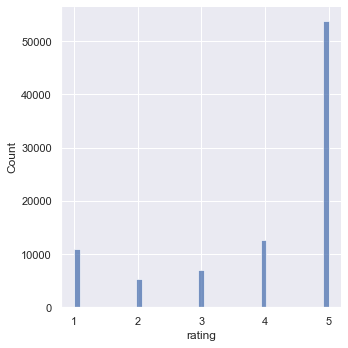

In [11]:
# most popular magazines 
sns.displot(df1, x="rating")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

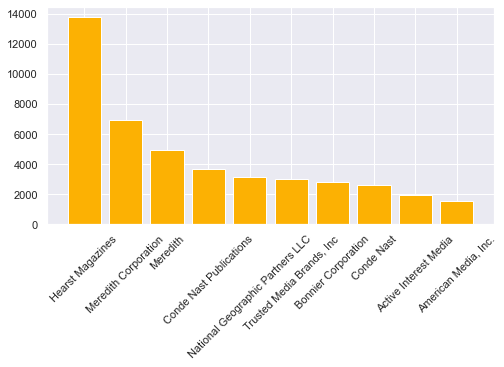

In [12]:
# most popular brand
top_brand = df1_df3.groupby(by='brand').count().sort_values(by=['rating'],ascending= False).head(10)
plt.bar(top_brand.index,top_brand['rating'], color = '#fcb103')
plt.xticks(rotation = 45) 

In [13]:
# most popular product
top_10_magazine = df1.groupby(by='asin').count().sort_values(by=['rating'],ascending= False).head(10)
top_10_magazine

reviewerID  rating  timestamp
asin                                     
B00005NIOH        1718    1718       1718
B00005N7Q1        1537    1537       1537
B00005N7SC        1480    1480       1480
B00007B10Y        1409    1409       1409
B001LF4EVO        1339    1339       1339
B00005R8BR        1244    1244       1244
B000IOEJ8W        1064    1064       1064
B00005N7SA         977     977        977
B000ICB4T6         966     966        966
B00079RO7G         949     949        949

Text(0.5, 1.0, 'Top magazines')

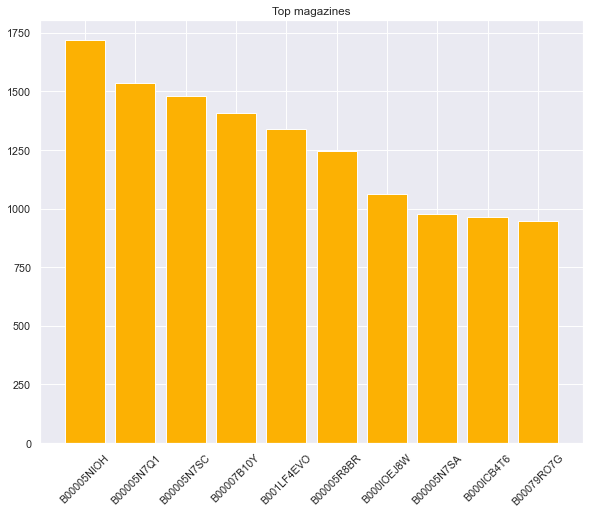

In [14]:
fig, ax = plt.subplots(figsize = (10,8), dpi=70)
plt.bar(top_10_magazine.index,top_10_magazine['rating'], color = '#fcb103')
plt.xticks(rotation = 45) 
plt.title('Top magazines')

In [15]:
# most influence
top_10_user = df1.groupby(by='reviewerID').count().sort_values(by=['rating'],ascending= False).head(10)
top_10_user

asin  rating  timestamp
reviewerID                             
A3JPFWKS83R49V    55      55         55
A2OTUWUSH49XIN    26      26         26
AEMZRE6QYVQBS     25      25         25
A3GA09FYFKL4EY    24      24         24
A3R7MXVQRGGIQ9    22      22         22
A30H2335OM7RD6    22      22         22
A1RPTVW5VEOSI     21      21         21
AKMEY1BSHSDG7     21      21         21
AVF9FV7AMRP5C     20      20         20
A2H3JURQZOHVMB    20      20         20

Text(0.5, 1.0, 'Top customers')

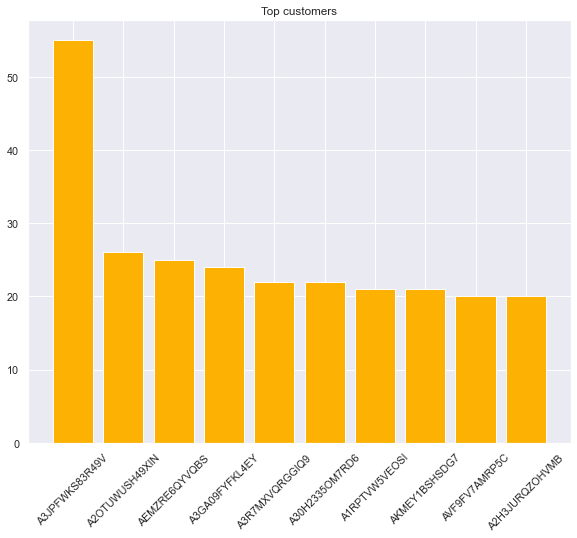

In [16]:
fig, ax = plt.subplots(figsize = (10,8), dpi=70)
plt.bar(top_10_user.index,top_10_user['rating'], color = '#fcb103')
plt.xticks(rotation = 45) 
plt.title('Top customers')

# Memory-based Collaborative Filter

In [17]:
df1a = df1.drop_duplicates(subset=['reviewerID','asin'], keep='first')
df1a.shape

(88318, 4)

In [18]:
df = df1a[['reviewerID','asin','rating']].pivot(index='reviewerID',columns='asin',values='rating')

In [19]:
df.fillna(0,inplace=True)

## item-item

In [21]:
df['B00005N7NQ'].value_counts()

0.0    71982
5.0       57
4.0       22
1.0       16
2.0       12
3.0        9
Name: B00005N7NQ, dtype: int64

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

item_matrix = pd.DataFrame(cosine_similarity(df.T),index=df.T.index,columns=df.T.index)


In [36]:
print(' 10 recommendations to users who have buy B00005N7Q1	')
recommended_buy = item_matrix['B00005N7Q1'].sort_values(ascending=False)[:11]
recommended_buy

 10 recommendations to users who have buy B00005N7Q1	


asin
B00005N7Q1    1.000000
B00006LIR1    0.040265
B00005R8BL    0.036821
B0193CNAIY    0.028030
B00006K1BF    0.028030
B00005N7SA    0.024097
B00005N7SC    0.022225
B007FIR1Z2    0.019820
B007ZUWNA8    0.019072
B00007AZRH    0.018646
B000UMJODW    0.017431
Name: B00005N7Q1, dtype: float64

In [37]:
actual_buy = np.array(df3[df3['asin'] == "B00005N7Q1"]['also_buy'])
actual_buy

array([list(['B002VB3X96', 'B001THPA26', 'B0029XHGRQ', 'B0047VIAMI', 'B002PXVZOU', 'B004GVZUUY', 'B002CT515Q', 'B001THPA3U', 'B0089FUF6W', 'B0029XHGVC', 'B001TP73UU', 'B004GVZUU4', 'B002CT51EM', 'B01N702LLM', 'B002PXW06C', 'B01BJ91ZW2', 'B002BFZ9NA', 'B002PXW0EO', 'B000063XJH', 'B001THPA1W', 'B0029XHGTY', 'B000063XJR', 'B00007AZRH', 'B079JCLNZ4', 'B00005NIOH', 'B0061SHL48', 'B002PXW24C', 'B00005N7PT', 'B0029XHGSU', 'B0061SHL16', 'B003I7HS3Y', 'B002PXVYGO', 'B0061SHKQ2', 'B002LDA9VY', 'B000G6DK5U', 'B002PXVYBE', 'B002PXVZGI', 'B002PXVYVE', 'B002V0CJL0', 'B0029XHGVM', 'B00KRPPEWW', 'B0029XHGSK', 'B00005N7R5', 'B0032KHQTS', 'B01N819UDU', 'B001THPA12', 'B002BFZ9MQ', '0470595469', 'B002PXVYUU', 'B002PXVYRI', 'B002PXVYO6', 'B000063XJL', 'B0047VIAI2', 'B0039L2QLS', 'B002ANPG4U', 'B01ISG1VVE', 'B001THPA58', 'B00007AZWJ', 'B001THPA1C', 'B001U5SPLK', 'B01N35UMQV', 'B00AHKJ9IM', 'B0058EONOM', 'B001TP73UA', 'B000R2YU5M', 'B001THPA4O', 'B00KQ0HP2K', 'B0061SHKVW', 'B001THPA4Y', 'B002PXVZO0', 'B003N3

In [38]:
[x for x in recommended_buy if x in actual_buy]

[]

## user-user

In [43]:
# too many reviewers, it cost too much to compute. more than 3 hours 
# very sparse matrix
user_list  = df1.groupby(by='reviewerID').count().sort_values(by=['rating'],ascending= False)

# filter frequet users to build a recommendation system
filtered_user = user_list[user_list['asin'] >=3]
filtered_df = df.loc[filtered_user.index] 

In [44]:
user_matrix = pd.DataFrame(cosine_similarity(filtered_df),index=filtered_df.index,columns=filtered_df.index)
user_matrix['A3JPFWKS83R49V'].sort_values(ascending=False)[:3]
# we can see that user A2877WXAPQ7T50 is the most similar user to user A3JPFWKS83R49V

reviewerID
A3JPFWKS83R49V    1.000000
A2877WXAPQ7T50    0.304830
ADAAXJNRTTX0D     0.287032
Name: A3JPFWKS83R49V, dtype: float64

In [45]:
print('recommendations to users A3JPFWKS83R49V')
history_similar_user = filtered_df.loc['A2877WXAPQ7T50'].T
purchased_similar_user = history_similar_user[history_similar_user != 0].dropna()
purchased_similar_user

recommendations to users A3JPFWKS83R49V


asin
B00005N7P0    5.0
B00005N7SC    5.0
B00005N7TL    5.0
B00005NIN8    5.0
B00005NIOC    5.0
Name: A2877WXAPQ7T50, dtype: float64

In [46]:
print('user A3JPFWKS83R49V actully purchased')

history = df.loc[['A3JPFWKS83R49V']].T
purchased = history[history !=0].dropna()
purchased

user A3JPFWKS83R49V actully purchased


reviewerID  A3JPFWKS83R49V
asin                      
B00005N7OJ             3.0
B00005N7P0             4.0
B00005N7PS             3.0
B00005N7QD             5.0
B00005N7QI             3.0
B00005N7QS             2.0
B00005N7R0             4.0
B00005N7SA             4.0
B00005N7SC             4.0
B00005N7SS             4.0
B00005N7T3             4.0
B00005N7TL             3.0
B00005N7U1             4.0
B00005N7UC             4.0
B00005N7XG             2.0
B00005N7XO             4.0
B00005NIN8             5.0
B00005NINH             4.0
B00005NINU             4.0
B00005NINY             3.0
B00005NIO2             4.0
B00005NIOC             3.0
B00005NIOH             5.0
B00005NIOM             4.0
B00005NIOP             4.0
B00005NIOW             4.0
B00005NIPH             3.0
B00005NIPP             3.0
B00005NIRE             4.0
B00005NIRG             3.0
B00005NIRS             4.0
B00005QJDW             4.0
B00005R8BL             3.0
B00005UMOT             4.0
B00005V3E8             3.0
B000063XJL             2.0
B000063XJN             4.0
B00006GXD4             4.0
B00006J9HV             3.0
B00006KT0K             4.0
B00006KULE             3.0
B00006LIR1             4.0
B00007AWME             4.0
B00007AZXE             4.0
B00008DP07             4.0
B00008GT1F             3.0
B0000C4CU9             4.0
B000EGCIW8             4.0
B000EQ4010             4.0
B000FTJ7BE             5.0
B000ILYHSM             3.0
B000IMVNQU             4.0
B000O1PKOG             3.0
B00ENONLJ6             4.0
B01BJ905FA             5.0

In [47]:
# we can see that user A3JPFWKS83R49V already purchased to all of them 
purchased.index.intersection(purchased_similar_user.index)


Index(['B00005N7P0', 'B00005N7SC', 'B00005N7TL', 'B00005NIN8', 'B00005NIOC'], dtype='object', name='asin')

## item_user

In [52]:
user_item_matrix

asin           B00005N7NQ B00005N7O3 B00005N7O4 B00005N7O6 B00005N7O9  \
reviewerID                                                              
A3JPFWKS83R49V        0.0        0.0        0.0   0.308321   0.114551   
A2OTUWUSH49XIN        0.0        0.0        0.0        0.0        0.0   
AEMZRE6QYVQBS         0.0        0.0        0.0        0.0        0.0   
A3GA09FYFKL4EY        0.0        0.0        0.0        0.0        0.0   
A3R7MXVQRGGIQ9        0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
A1PQX82Z2KLWQI        NaN        NaN        NaN        NaN        NaN   
A10EQ7UTPVKUB5        NaN        NaN        NaN        NaN        NaN   
A1QSAMMF8JNIRR        NaN        NaN        NaN        NaN        NaN   
A3BQGQCAJ5B4ZB        NaN        NaN        NaN        NaN        NaN   
A1H8BPEU6XZFO3        NaN        NaN        NaN        NaN        NaN   

asin           B00005N7OA B00005N7OC B00005N7OD B00005N7OF B00005N7OJ  \
reviewerID                                                              
A3JPFWKS83R49V        0.0        0.0        0.0        0.0   1.690434   
A2OTUWUSH49XIN        0.0        0.0        0.0   0.286764        0.0   
AEMZRE6QYVQBS         0.0        0.0        0.0        0.0        0.0   
A3GA09FYFKL4EY        0.0   0.209029   0.411464        0.0        0.0   
A3R7MXVQRGGIQ9        0.0        0.0        0.0        0.0        0.0   
...                   ...        ...        ...        ...        ...   
A1PQX82Z2KLWQI        NaN        NaN        NaN        NaN        NaN   
A10EQ7UTPVKUB5        NaN        NaN        NaN        NaN        NaN   
A1QSAMMF8JNIRR        NaN        NaN        NaN        NaN        NaN   
A3BQGQCAJ5B4ZB        NaN        NaN        NaN        NaN        NaN   
A1H8BPEU6XZFO3        NaN        NaN        NaN        NaN        NaN   

asin           B00005N7OP B00005N7OU B00005N7OV B00005N7P0 B00005N7P8  \
reviewerID                                                              
A3JPFWKS83R49V   0.744875   0.309459   0.286663   1.202268   0.252226   
A2OTUWUSH49XIN        0.0        0.0   2.951009        0.0        0.0   
AEMZRE6QYVQBS         0.0        0.0        0.0        0.0    0.40117   
A3GA09FYFKL4EY   0.244378        0.0   1.670597        0.0        0.0   
A3R7MXVQRGGIQ9        0.0        0.0        0.0        0.0   0.315282   
...                   ...        ...        ...        ...        ...   
A1PQX82Z2KLWQI        NaN        NaN        NaN        NaN        NaN   
A10EQ7UTPVKUB5        NaN        NaN        NaN        NaN        NaN   
A1QSAMMF8JNIRR        NaN        NaN        NaN        NaN        NaN   
A3BQGQCAJ5B4ZB        NaN        NaN        NaN        NaN        NaN   
A1H8BPEU6XZFO3        NaN        NaN        NaN        NaN        NaN   

asin           B00005N7PA B00005N7PG B00005N7PH B00005N7PI B00005N7PL  \
reviewerID                                                              
A3JPFWKS83R49V        0.0        0.0        0.0   0.660941        0.0   
A2OTUWUSH49XIN        0.0        0.0        0.0        0.0        0.0   
AEMZRE6QYVQBS         0.0   1.149237        0.0        0.0        0.0   
A3GA09FYFKL4EY   0.516529        0.0        0.0        0.0        0.0   
A3R7MXVQRGGIQ9        0.0        0.0        0.0   0.429995        0.0   
...                   ...        ...        ...        ...        ...   
A1PQX82Z2KLWQI        NaN        NaN        NaN        NaN        NaN   
A10EQ7UTPVKUB5        NaN        NaN        NaN        NaN        NaN   
A1QSAMMF8JNIRR        NaN        NaN        NaN        NaN        NaN   
A3BQGQCAJ5B4ZB        NaN        NaN        NaN        NaN        NaN   
A1H8BPEU6XZFO3        NaN        NaN        NaN        NaN        NaN   

asin           B00005N7PN B00005N7PR B00005N7PS B00005N7PT B00005N7Q1  \
reviewerID                                                              
A3JPFWKS83R49V   0.328332        0.0        0.0   0.90

In [ ]:
user_item_matrix = pd.DataFrame(index=filtered_df.index, columns=filtered_df.columns)
item_matrix = pd.DataFrame(cosine_similarity(filtered_df.T),index=filtered_df.T.index,columns=filtered_df.T.index)

for i in range (user_item_matrix.shape[0]):
    for j in range(user_item_matrix.shape[1]):
        user = user_item_matrix.index[i]
        magazine = user_item_matrix.columns[j]
        if filtered_df.iloc[i,j] ==1:
            user_item_matrix.iloc[i,j] = 0
        else:
            top_10_songs = item_matrix.drop(index=[magazine])[magazine].nlargest(10)

            #print(band,'\n',top_10_songs)
            
            purchases = filtered_df.loc[user,top_10_songs.index]
            user_item_matrix.iloc[i,j] = sum(purchases*top_10_songs)/(sum(top_10_songs) + 0.0000001)
            #  replace the denominator with a very small number whenever it is 0 to avoid the error, the numerator will become 0 anyway.
            
user_item_matrix.fillna(0,inplace=True)

In [ ]:
# What are the top 10  recommendations for user A3JPFWKS83R49V?
user_item_matrix.loc['A3JPFWKS83R49V'].sort_values(ascending=False)[:10]

1. score - value. 1-5. 1 2 3 are bad? how to take that into account?
2. filter users.
3. hybird

# Content-Based Recommendation System

Coming up attributes (topics. Paper) - Review as proxy – NLP to assign rating to attribute – content based 

In [52]:
df3['category'].explode().unique()
for i in df3['category'].explode().unique():
    df3[i] = [1 if i in x else 0 for x in df3['category']]
    

C:\Users\58386\AppData\Local\Temp/ipykernel_8784/2882233528.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df3[i] = [1 if i in x else 0 for x in df3['category']]


In [40]:
#df3 = df3.set_index('asin')
df3['description'] = df3.description.apply(lambda x: ', '.join([str(i) for i in x]))
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2320 entries, B00005N7NQ to B01HI8V1MC
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category         2320 non-null   object        
 1   tech1            2320 non-null   object        
 2   description      2320 non-null   object        
 3   fit              2320 non-null   object        
 4   title            2320 non-null   object        
 5   also_buy         2320 non-null   object        
 6   tech2            2320 non-null   object        
 7   brand            2320 non-null   object        
 8   feature          2320 non-null   object        
 9   rank             2320 non-null   object        
 10  also_view        2320 non-null   object        
 11  details          2320 non-null   object        
 12  main_cat         2320 non-null   object        
 13  similar_item     2320 non-null   object        
 14  date             0 non-null   

In [43]:
pip install rake-nltk


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\58386\anaconda3\python.exe -m pip install --upgrade pip' command.


In [44]:
df3['Key_words'] = ''
r = Rake()
for index, row in df3.iterrows():
    r.extract_keywords_from_text(row['description'])
    key_words_dict_scores = r.get_word_degrees()
    row['Key_words'] = list(key_words_dict_scores.keys())

In [45]:
df3.head(5)

category tech1  \
asin                                                                  
B00005N7NQ  [Magazine Subscriptions, Professional & Educat...         
B00005N7OC  [Magazine Subscriptions, Arts, Music &amp; Pho...         
B00005N7OD  [Magazine Subscriptions, Fashion &amp; Style, ...         
B00005N7O9  [Magazine Subscriptions, Sports, Recreation & ...         
B00005N7O6  [Magazine Subscriptions, Professional & Educat...         

                                                  description fit  \
asin                                                                
B00005N7NQ  REASON is edited for people interested in econ...       
B00005N7OC  Written by and for musicians. Covers a variety...       
B00005N7OD  Allure is the beauty expert. Every issue is fu...       
B00005N7O9  FLIGHT JOURNAL includes articles on aviation h...       
B00005N7O6  RIDER is published for the road and street rid...       

                                                    title  \
asin                                                        
B00005N7NQ  <span class="a-size-medium a-color-secondary"   
B00005N7OC  <span class="a-size-medium a-color-secondary"   
B00005N7OD  <span class="a-size-medium a-color-secondary"   
B00005N7O9  <span class="a-size-medium a-color-secondary"   
B00005N7O6  <span class="a-size-medium a-color-secondary"   

                                                     also_buy tech2  \
asin                                                                  
B00005N7NQ  [B002PXVYLE, B01MCU84LB, B000UHI2LW, B01AKS14A...         
B00005N7OC  [B002PXVYGE, B0054LRNC8, B000BVEELE, B00006KC3...         
B00005N7OD  [B001THPA4O, B002PXVZWW, B001THPA1M, B001THPA1...         
B00005N7O9  [B07JVF7QW4, B00ATQ6FPY, B002G551F6, B00008CGW...         
B00005N7O6  [B002PXVYD2, B01BM7TOU6, B000060MKJ, B000BNNIG...         

                                        brand feature  \
asin                                                    
B00005N7NQ                    Reason Magazine      []   
B00005N7OC           String Letter Publishers      []   
B00005N7OD            Conde Nast Publications      []   
B00005N7O9                  AirAge Publishing      []   
B00005N7O6  EPG Media & Specialty Information      []   

                                       rank  \
asin                                          
B00005N7NQ                               []   
B00005N7OC  742 in Magazine Subscriptions (   
B00005N7OD                               []   
B00005N7O9                               []   
B00005N7O6                               []   

                                                    also_view  \
asin                                                            
B00005N7NQ  [B002PXVYLE, B000UHI2LW, B01MCU84LB, B002PXW18...   
B00005N7OC  [B002PXVYGE, B0054LRNC8, B00006L16A, 171906487...   
B00005N7OD  [B002PXVZWW, B001THPA4O, B001THPA1M, B01N819UD...   
B00005N7O9  [B002G551F6, B00ATQ6FPY, B00005N7PT, B001THPA2...   
B00005N7O6  [B01BM7TOU6, B000060MKJ, B002PXVYD2, B000BNNIG...   

                                                      details  \
asin                                                            
B00005N7NQ  {'Format:': 'Print Magazine', 'Shipping: ': 'C...   
B00005N7OC  {'Format:': 'Print Magazine', 'Shipping: ': 'C...   
B00005N7OD  {'Format:': 'Print Magazine', 'Shipping: ': 'C...   
B00005N7O9  {'Format:': 'Print Magazine', 'Shipping: ': 'C...   
B00005N7O6  {'Format:': 'Print Magazine', 'Shipping: ': 'C...   

                          main_cat similar_item date price  \
asin                                                         
B00005N7NQ  Magazine Subscriptions               NaT         
B00005N7OC  Magazine Subscriptions               NaT         
B00005N7OD  Magazine Subscriptions               NaT         
B00005N7O9  Magazine Subscriptions               NaT         
B00005N7O6  Magazine Subscriptions               NaT         

                                                     imageURL  \
asi

In [27]:
df3.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'imageURL', 'imageURLHighRes',
       'Key_words'],
      dtype='object')